In [35]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
f_name=font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pwd

'C:\\Users\\lg_gram\\Intel\\bigcontest'

In [40]:
consume=pd.read_csv("eco jeju/04_음식관련 카드소비_CARD_SPENDING.csv",encoding='euc-kr')

In [41]:
consume.head()

base_date city    emd_cd emd_nm mct_cat_cd mct_cat_nm  use_cnt    use_amt
0  2018-01-06  제주시  50110650     연동     C00100         한식     3643  127777300
1  2018-01-09  제주시  50110650     연동     C00500      패스트푸드      432    6711675
2  2018-01-15  제주시  50110650     연동     C01200      농축수산물      236   16089579
3  2018-01-15  제주시  50110650     연동     A00200    마트/슈퍼마켓     4031  121979867
4  2018-01-20  제주시  50110650     연동     C01000         식품      633   30410674

In [42]:
consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544805 entries, 0 to 544804
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   base_date   544805 non-null  object
 1   city        544805 non-null  object
 2   emd_cd      544805 non-null  object
 3   emd_nm      544805 non-null  object
 4   mct_cat_cd  544805 non-null  object
 5   mct_cat_nm  544805 non-null  object
 6   use_cnt     544805 non-null  int64 
 7   use_amt     544805 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 33.3+ MB


- 결측치는 없지만 end_nm,end_cd에 알수없음,xxxx데이터 

In [43]:
consume.head()

base_date city    emd_cd emd_nm mct_cat_cd mct_cat_nm  use_cnt    use_amt
0  2018-01-06  제주시  50110650     연동     C00100         한식     3643  127777300
1  2018-01-09  제주시  50110650     연동     C00500      패스트푸드      432    6711675
2  2018-01-15  제주시  50110650     연동     C01200      농축수산물      236   16089579
3  2018-01-15  제주시  50110650     연동     A00200    마트/슈퍼마켓     4031  121979867
4  2018-01-20  제주시  50110650     연동     C01000         식품      633   30410674

## 지역별 결제 건수와 결제 금액  총합 비교

### 시별 

In [44]:
city=consume[['city','use_cnt','use_amt']].groupby(['city']).sum()

Text(0, 0.5, '결제 금액')

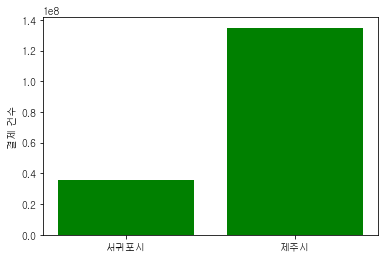

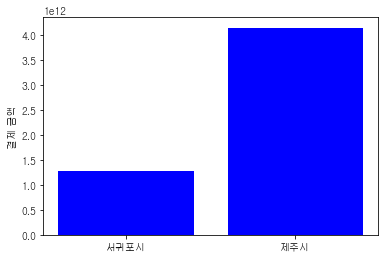

In [45]:
plt.figure(5)
plt.bar(city.index,city['use_cnt'],color='g',label='결제 건수')
plt.ylabel('결제 건수')
plt.figure(6)
plt.bar(city.index,city['use_amt'],color='b',label='결제 금액')
plt.ylabel('결제 금액')

### 읍면동별 

In [56]:
area_use=consume.groupby(['emd_nm'])['use_cnt','use_amt'].sum()
area_use.drop(['알수없음'],inplace=True)
area_use['amt_per_cnt']=area_use['use_amt']/area_use['use_cnt']
area_use.head()

use_cnt       use_amt   amt_per_cnt
emd_nm                                      
건입동      2760910   92487850639  33499.045836
구좌읍      2135376   72679567742  34035.957949
남원읍      2357103   92488318068  39238.131752
노형동     18894772  563831513655  29840.609543
대륜동      3288271  112581562692  34237.312768

Text(0, 0.5, '객단가')

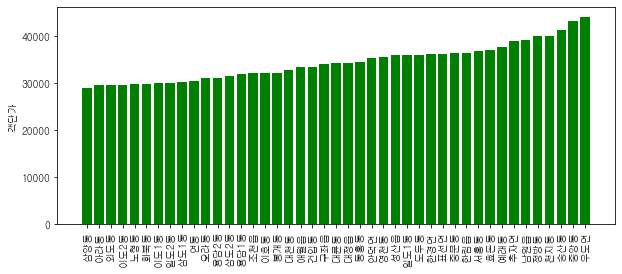

In [62]:
area_use=area_use.sort_values(by='amt_per_cnt')
plt.figure(1,figsize=(10,4))
plt.bar(area_use.index,area_use['amt_per_cnt'],color='green',label='객단가')
plt.xticks(rotation=90)
plt.ylabel('객단가')

Text(0, 0.5, '결제 금액')

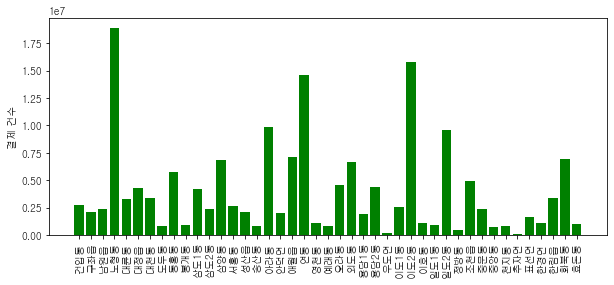

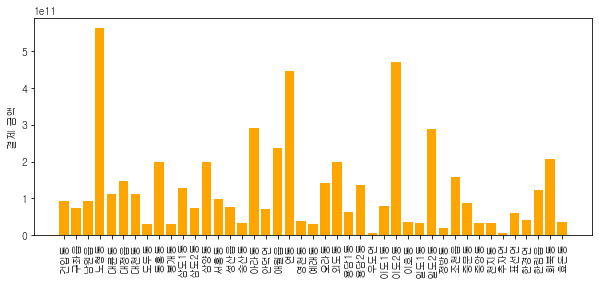

In [47]:
plt.figure(1,figsize=(10,4))
plt.bar(area_use.index,area_use['use_cnt'],color='green',label='결제 건수')
plt.xticks(rotation=90)
plt.ylabel('결제 건수')
plt.figure(2,figsize=(10,4))
plt.bar(area_use.index,area_use['use_amt'],color='orange',label='결제 금액')
plt.xticks(rotation=90)
plt.ylabel('결제 금액')

- 노형동,연동,이도2동,일도2동,아라동이 결제가 높다 (거주지역, 관광지역? 인구, 업종, 위치)
- 우도면,추차면,정방동,봉개동,예래동이 결제가 낮다.

## 지역별 업종별 결제건수 총합 비교

In [75]:
area_mct=consume[['use_cnt','emd_nm','mct_cat_nm']].groupby(['emd_nm','mct_cat_nm']).sum()
area_mct.drop(['알수없음'],inplace=True)

In [76]:
area_mct

use_cnt
emd_nm mct_cat_nm         
건입동    간식           193332
       농축수산물         90610
       마트/슈퍼마켓      775608
       배달           118563
       부페             2331
...                    ...
효돈동    아시아음식         27886
       양식            10213
       주점및주류판매        4485
       패스트푸드         55823
       한식           277258

[473 rows x 1 columns]

In [77]:
data=area_mct.unstack(level=1)

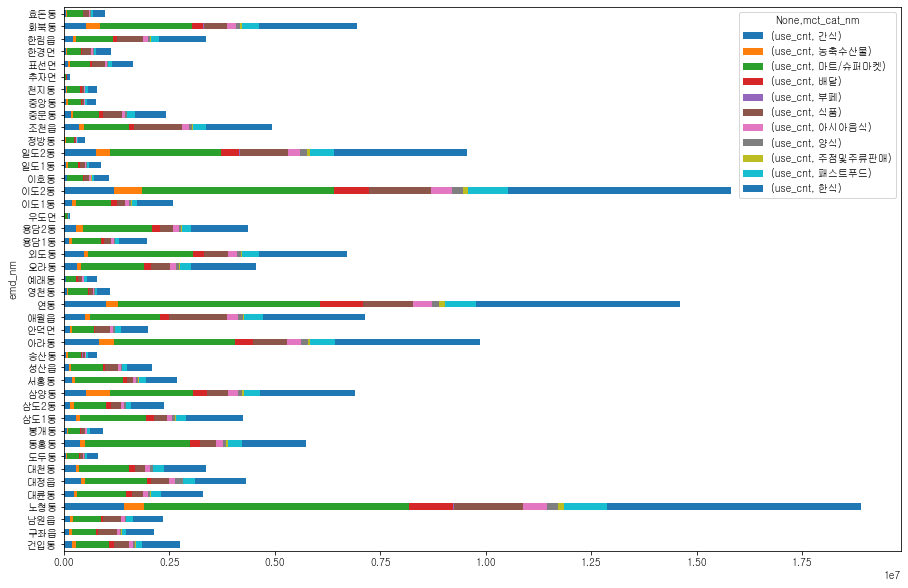

In [78]:
data.plot.barh(stacked=True,figsize=(15,10))

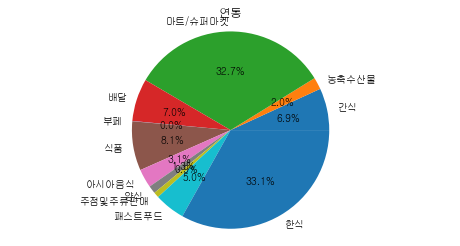

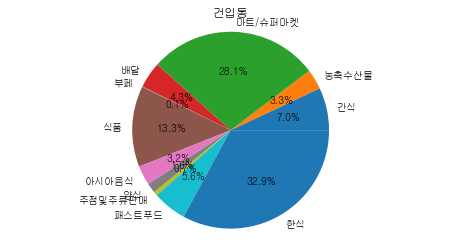

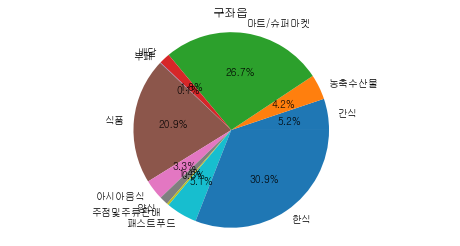

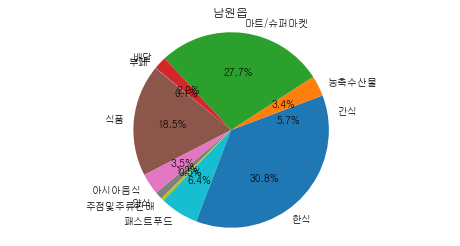

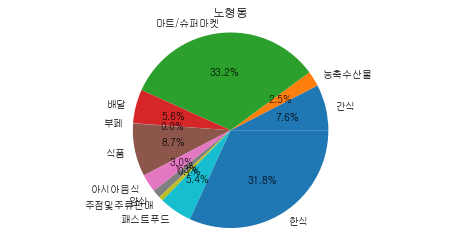

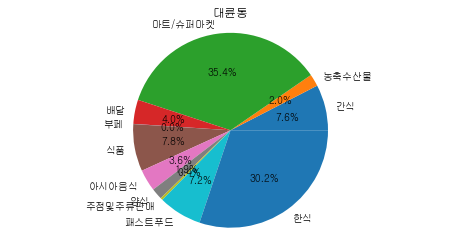

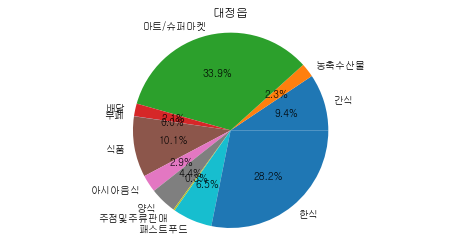

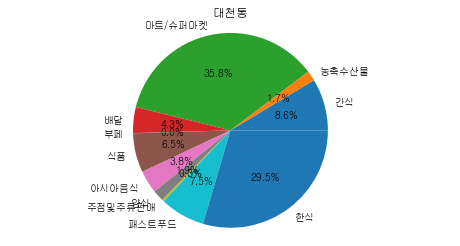

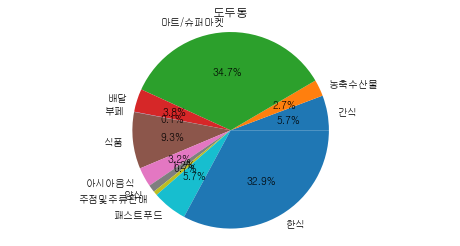

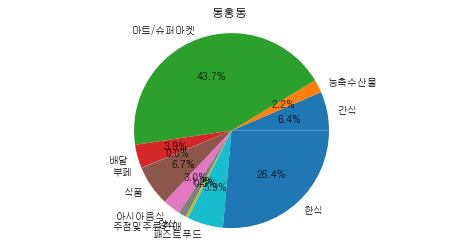

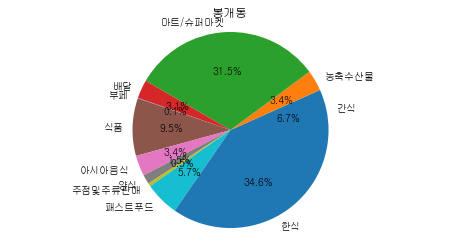

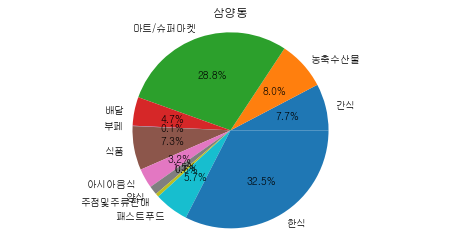

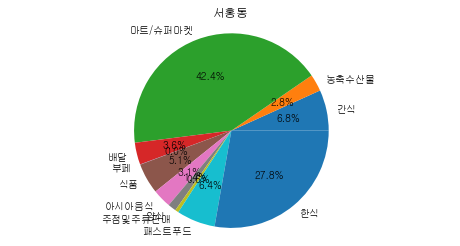

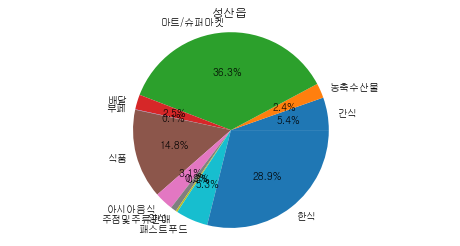

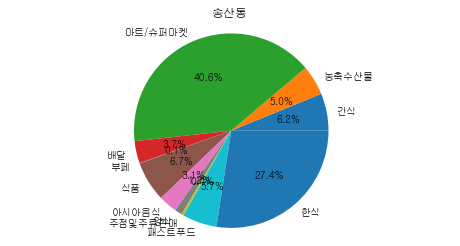

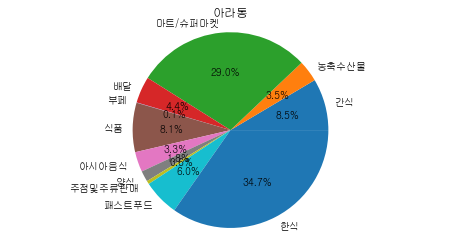

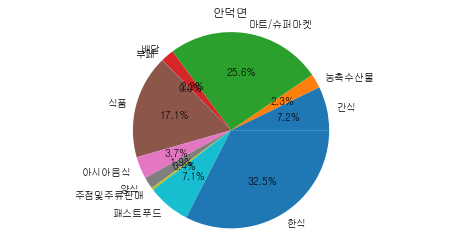

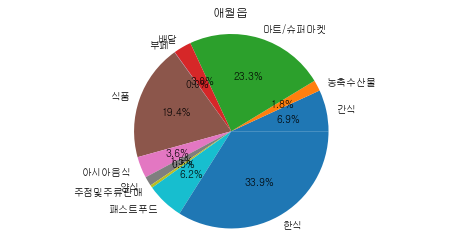

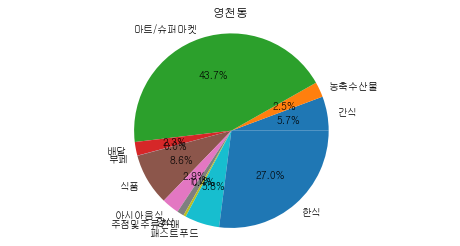

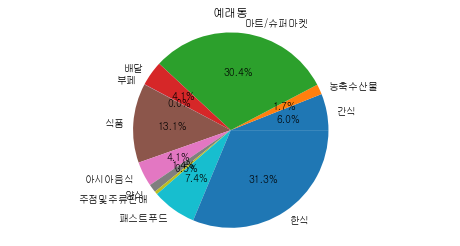

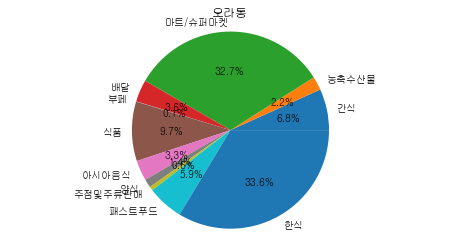

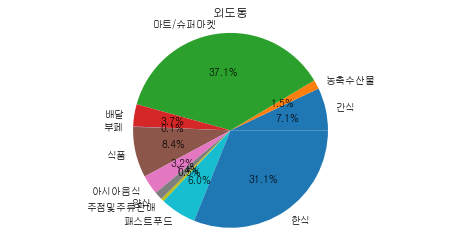

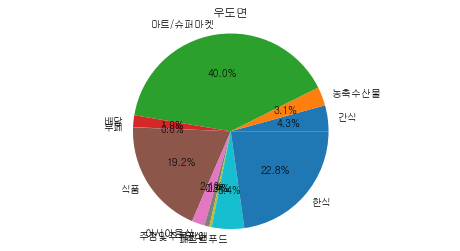

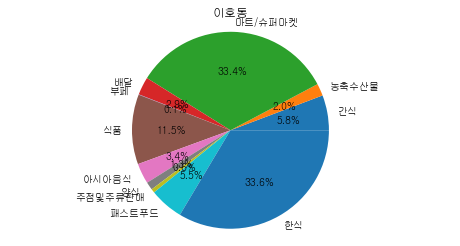

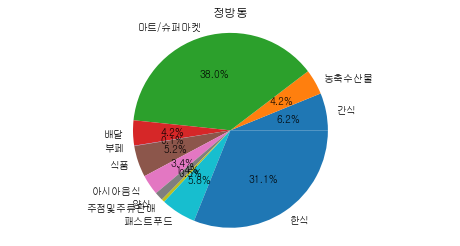

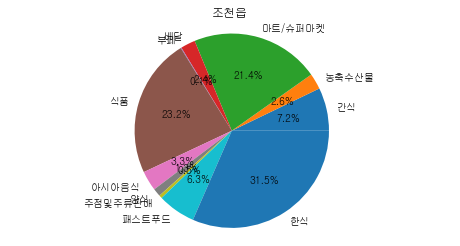

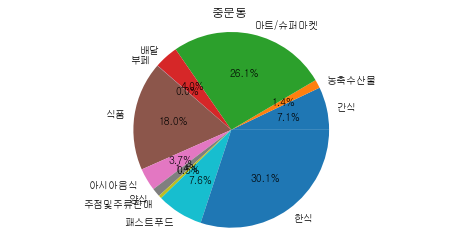

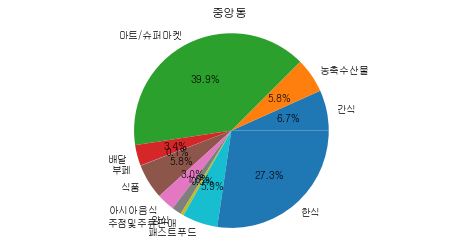

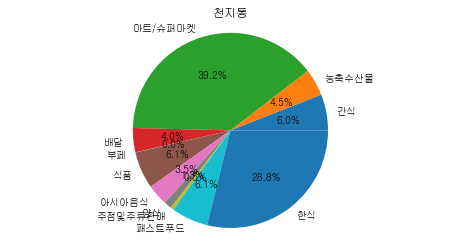

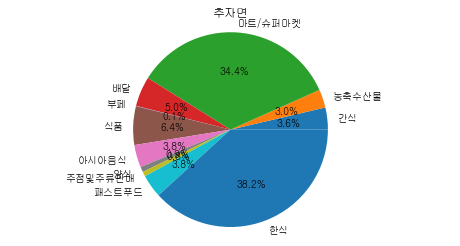

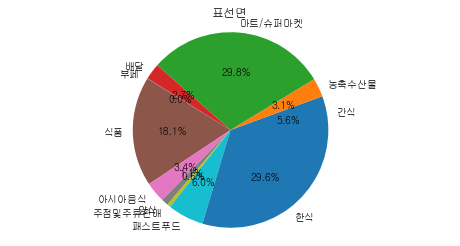

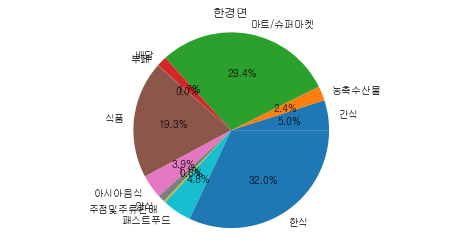

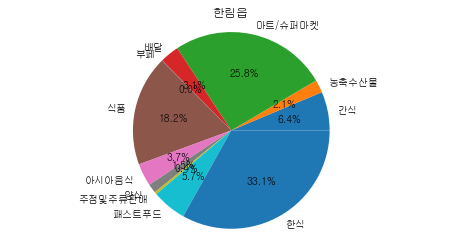

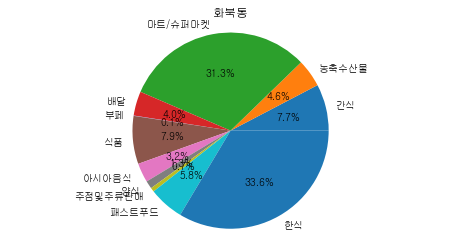

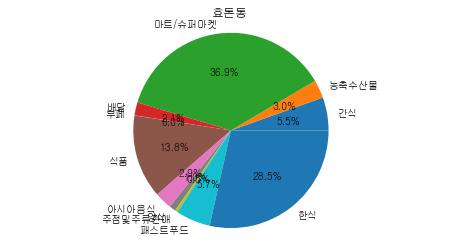

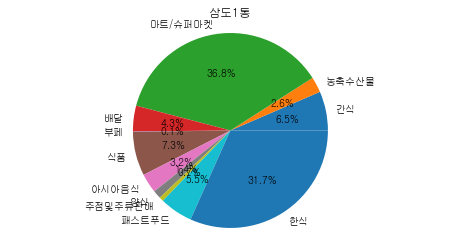

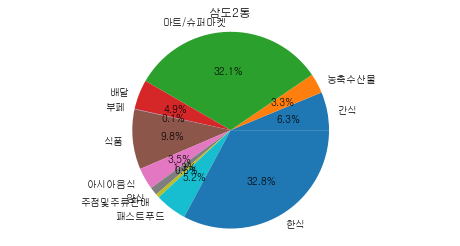

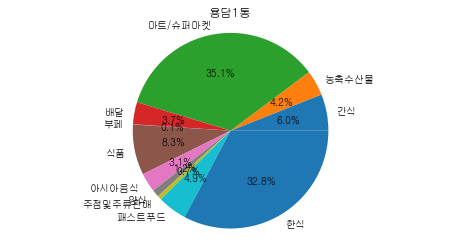

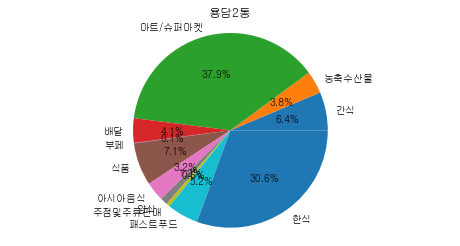

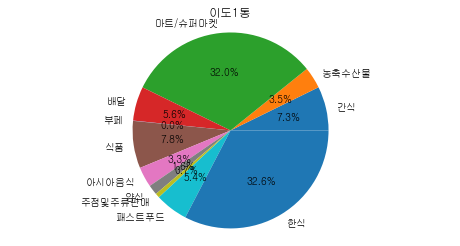

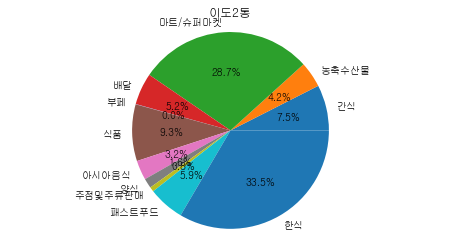

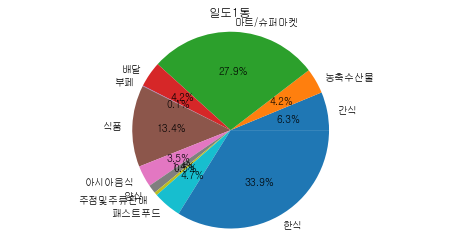

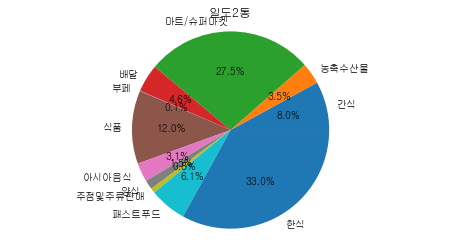

<Figure size 576x288 with 0 Axes>

In [52]:
for name in consume['emd_nm'].unique():
    plt.figure(figsize=(8,4))
    if name=='알수없음':
        continue
    area_mic_p=area_mct.loc[(name,),]
    plt.pie(area_mic_p,labels=area_mic_p.index,autopct='%.1f%%')
    plt.axis('equal')
    plt.title(name)


- 대부분의 동에 마트와 한식 , 식품 순으로 결제 건수,비율이 가장 높다  
- 읍면은 배달의 비중이 매우 작다.
- top 5 노형동,연동,이도2동,일도2동,아라동은 패스트푸드,배달이 다른 동에 비해 조금 높다.

In [53]:
data_high=area_mct.loc[['노형동','연동','이도2동','일도2동','아라동']].unstack(level=1)

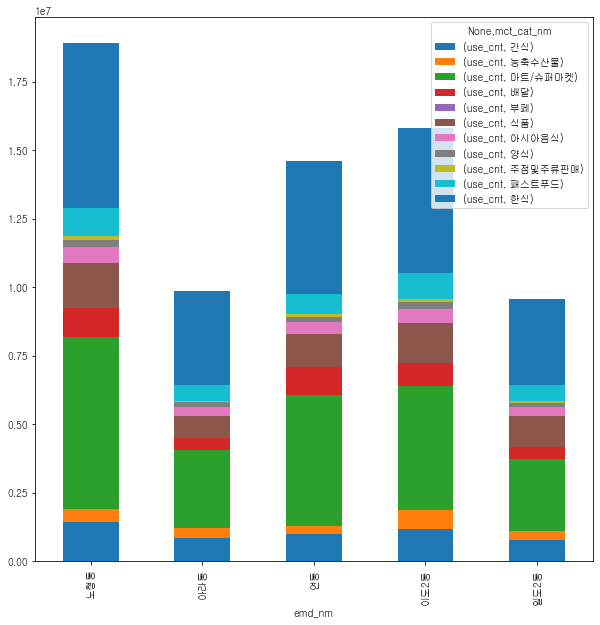

In [54]:
data_high.plot.bar(stacked=True,figsize=(10,10))

-결제건수 금액 top5 동네는 한식과 마트, 슈퍼마켓 업종에서 가장 결제건수가 많았다  
-간식= 편의점?

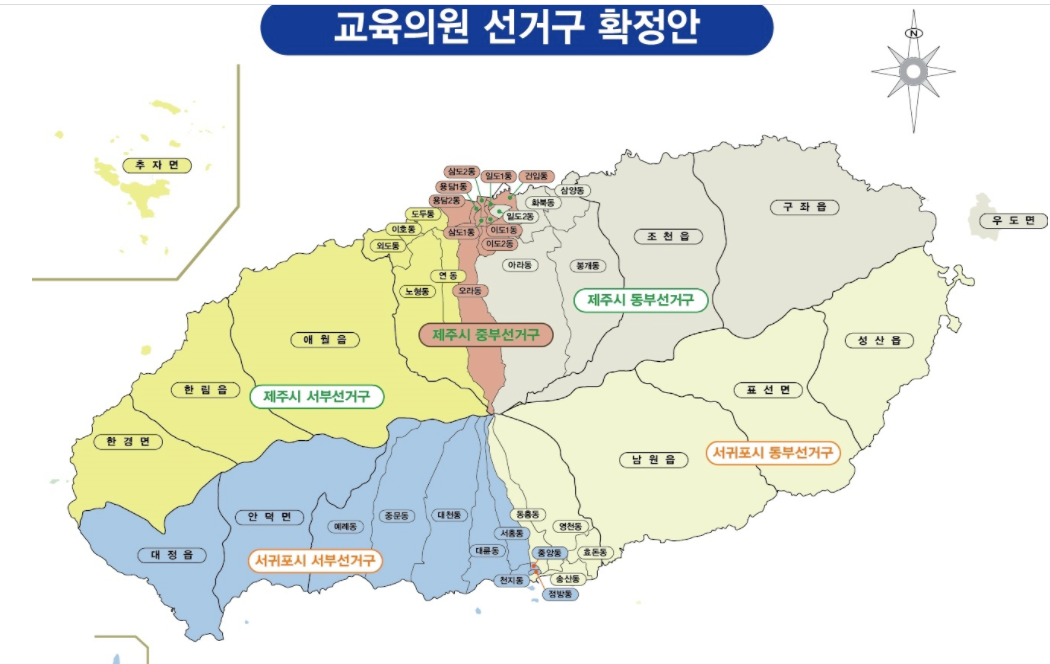

In [55]:
from IPython.display import Image
Image("C:/Users/lg_gram/Intel/bigcontest/제주도 지도.png")

In [81]:
#지역별 업종별 객단가 비교
area_mct=consume[['use_cnt','use_amt','emd_nm','mct_cat_nm']].groupby(['emd_nm','mct_cat_nm']).sum()
area_mct['amt_per_cnt']=area_mct['use_amt']/area_mct['use_cnt']
area_mct.drop(['알수없음'],inplace=True)
area_mct

use_cnt      use_amt   amt_per_cnt
emd_nm mct_cat_nm                                    
건입동    간식           193332   2323951584  12020.522128
       농축수산물         90610   8451532877  93273.732226
       마트/슈퍼마켓      775608  25330854527  32659.351795
       배달           118563   2754741956  23234.415087
       부페             2331    217556887  93331.997855
...                    ...          ...           ...
효돈동    아시아음식         27886   1155078340  41421.442301
       양식            10213    388501125  38039.863409
       주점및주류판매        4485    188596241  42050.443924
       패스트푸드         55823    976563611  17493.929223
       한식           277258   9895672213  35691.205350

[473 rows x 3 columns]

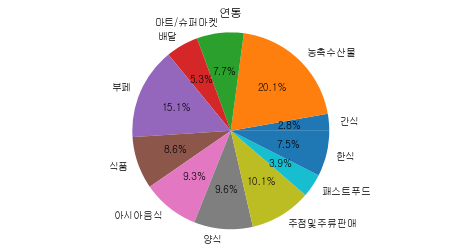

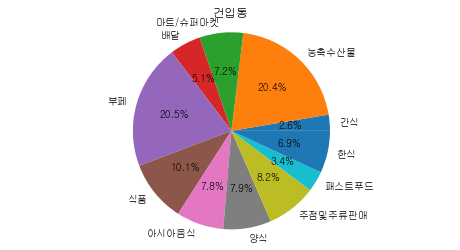

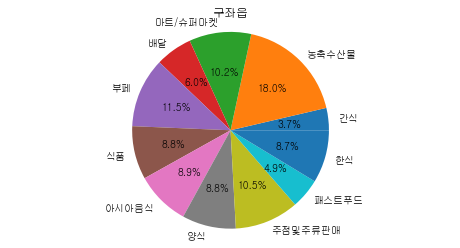

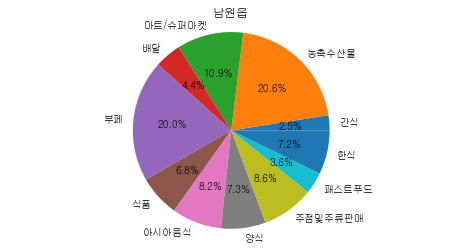

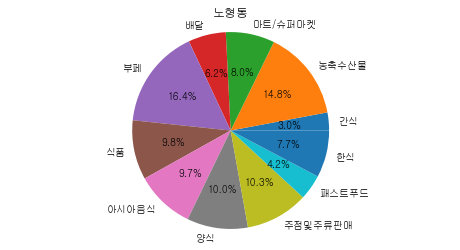

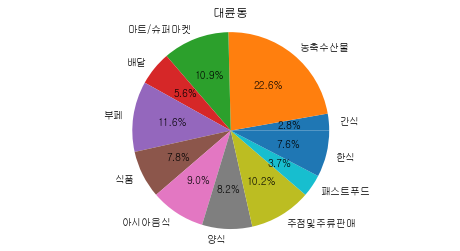

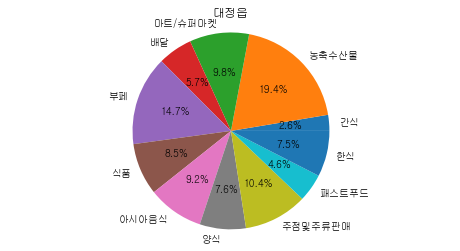

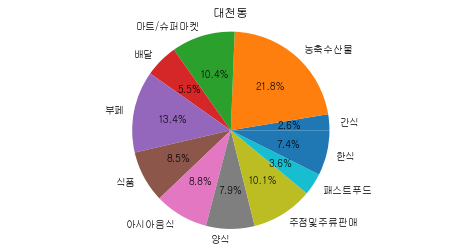

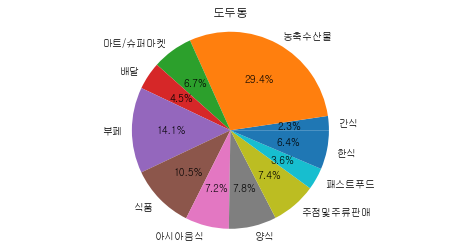

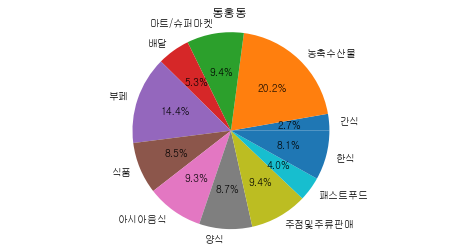

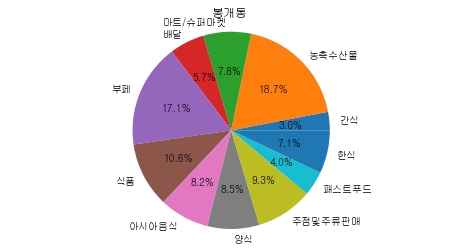

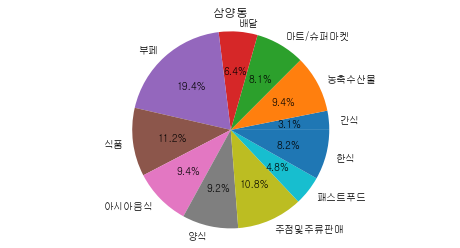

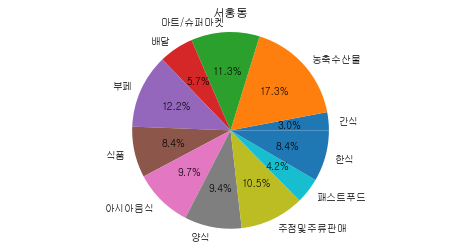

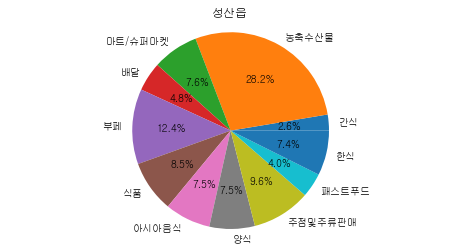

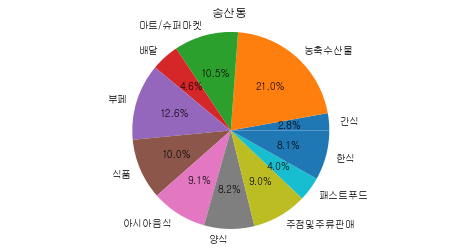

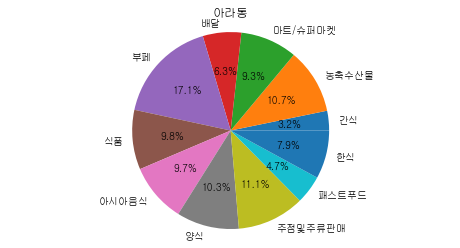

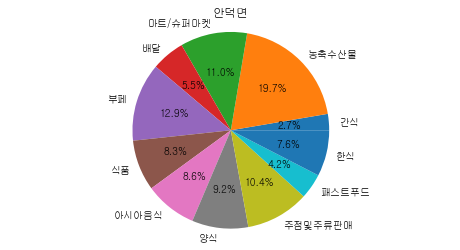

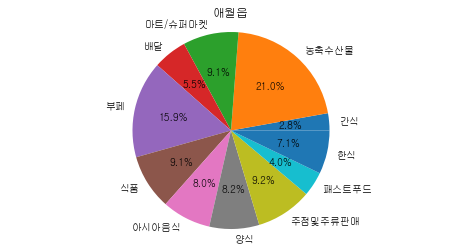

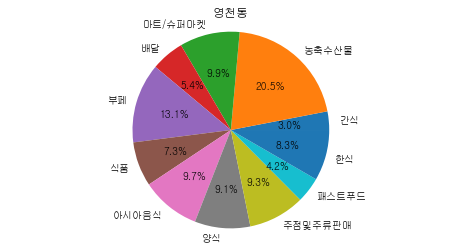

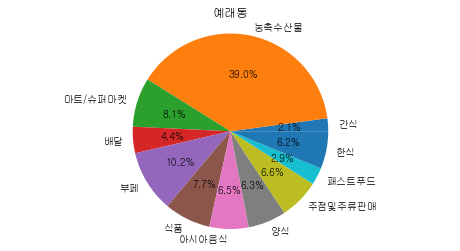

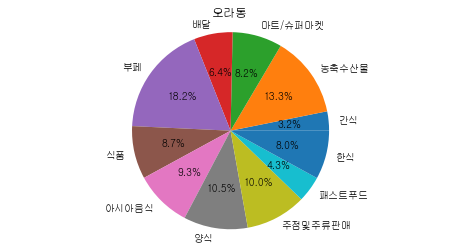

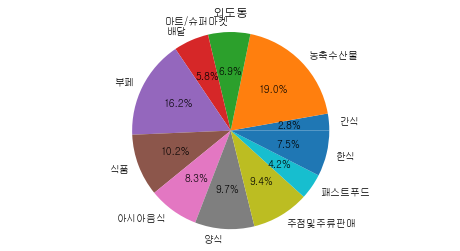

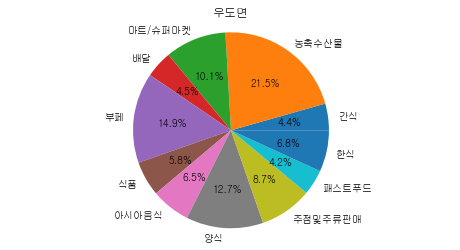

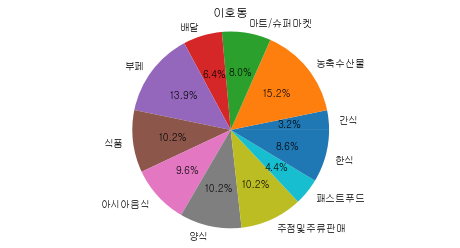

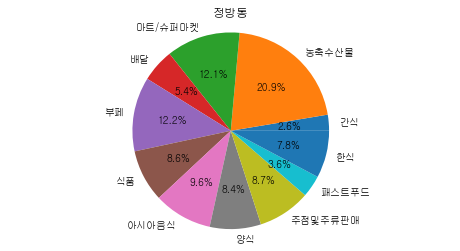

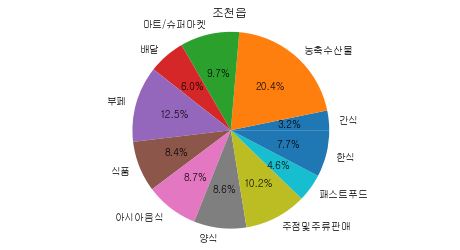

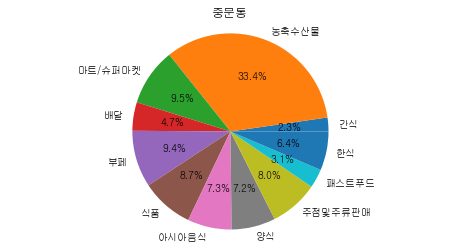

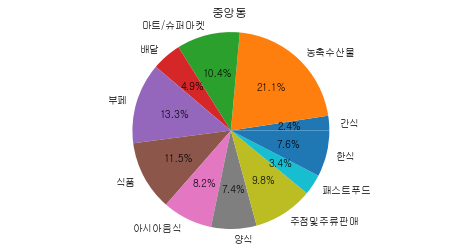

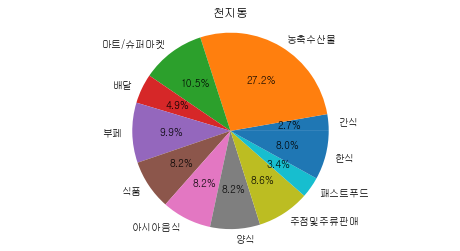

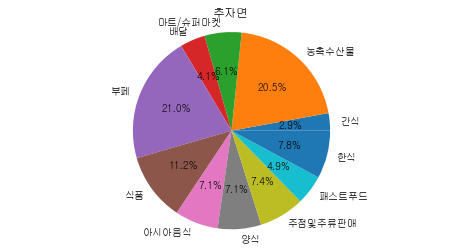

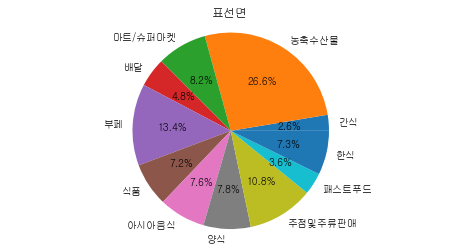

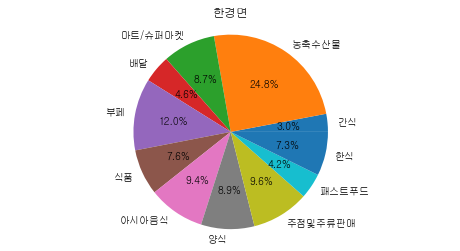

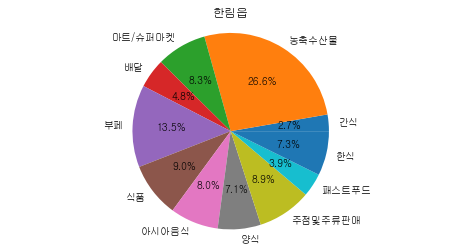

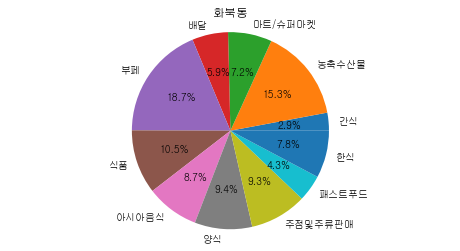

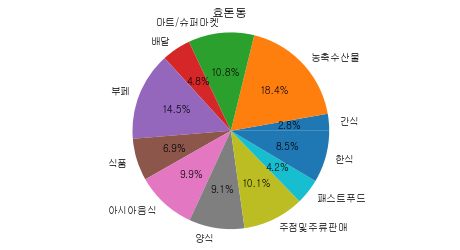

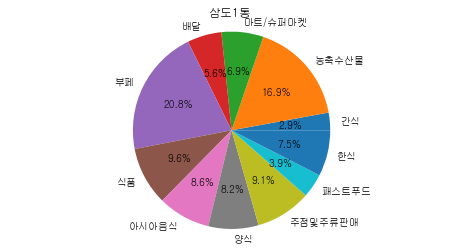

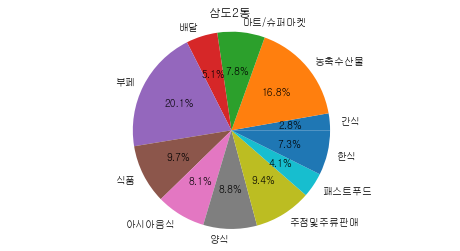

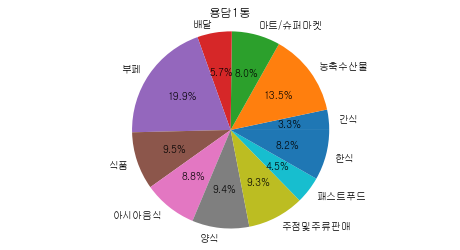

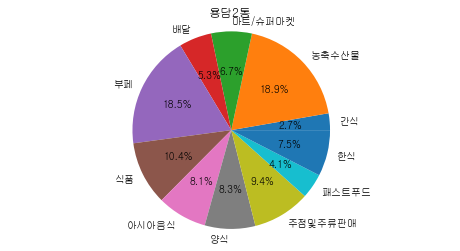

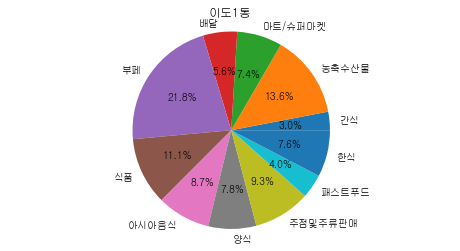

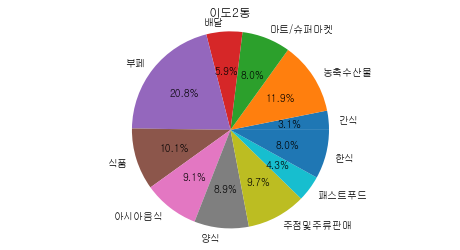

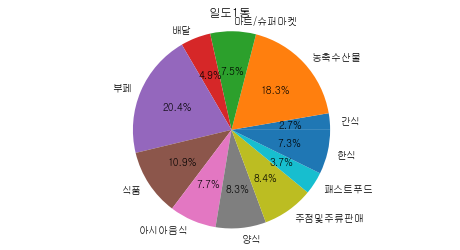

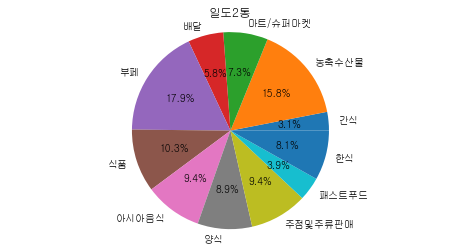

<Figure size 576x288 with 0 Axes>

In [82]:
for name in consume['emd_nm'].unique():
    plt.figure(figsize=(8,4))
    if name=='알수없음':
        continue
    area_mic_p=area_mct.loc[(name,),'amt_per_cnt']
    plt.pie(area_mic_p,labels=area_mic_p.index,autopct='%.1f%%')
    plt.axis('equal')
    plt.title(name)

## 업종별 결제 건수와 결제 금액 평균 비교

In [17]:
mct=consume[['use_amt','use_cnt','mct_cat_nm']].groupby(['mct_cat_nm']).mean()
mct[['use_amt','use_cnt']]=mct[['use_amt','use_cnt']].astype(int)

In [18]:
mct.describe()

use_amt     use_cnt
count  1.100000e+01   11.000000
mean   8.816427e+06  275.454545
std    1.149088e+07  342.692680
min    4.946820e+05    7.000000
25%    2.242144e+06   74.500000
50%    3.296577e+06  142.000000
75%    9.380650e+06  269.000000
max    3.238936e+07  949.000000

(0, 1000)

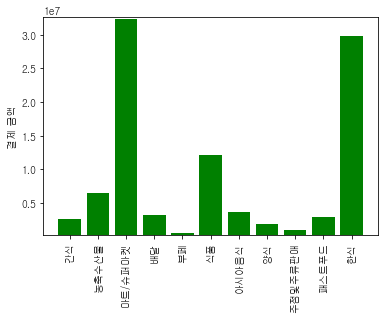

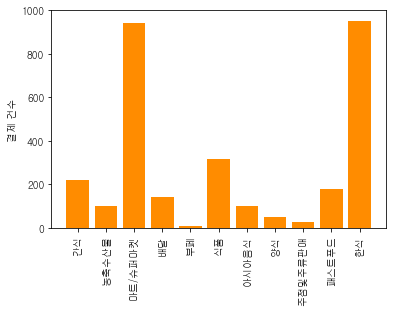

In [19]:
plt.figure(1)
plt.bar(mct.index,mct['use_amt'],color='green')
plt.xticks(rotation=90)
plt.ylabel('결제 금액')
plt.ylim([mct['use_amt'].min()-200000,mct['use_amt'].max()+200000])
plt.figure(2)
plt.bar(mct.index,mct['use_cnt'],color='darkorange')
plt.xticks(rotation=90)
plt.ylabel('결제 건수')
plt.ylim([0,1000])

Text(0.5, 1.0, '결제 건수')

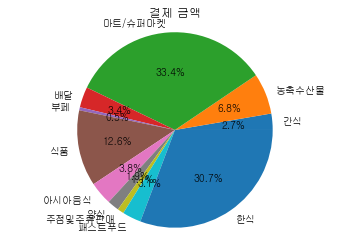

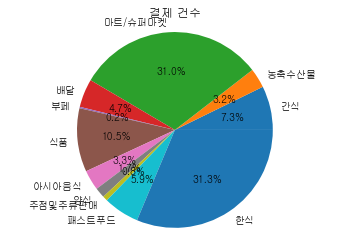

In [85]:
plt.figure(3)
plt.pie(mct['use_amt'], labels=mct.index,autopct='%.1f%%')
plt.title('결제 금액')
plt.axis('equal')
plt.figure(4)
plt.pie(mct['use_cnt'], labels=mct.index, autopct='%.1f%%')
plt.axis('equal')
plt.title('결제 건수')


- 업종별로 보았을 때 역시 마트,슈퍼마켓, 한식, 식품 업종의 결제 금액, 결제 건수가 높다
- 결제 금액 대비 결제 건수 비율이 높은 간식,배달,패스트푸드는 저렴한 거래, 빈번한 거래가 다른 업종에 비해 많다.

In [87]:
#업종별 객단가 확인
mct=consume[['use_amt','use_cnt','mct_cat_nm']].groupby(['mct_cat_nm']).mean()
mct[['use_amt','use_cnt']]=mct[['use_amt','use_cnt']].astype(int)
mct['amt_per_cnt']=mct['use_amt']/mct['use_cnt']
mct.sort_values(by='amt_per_cnt',inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

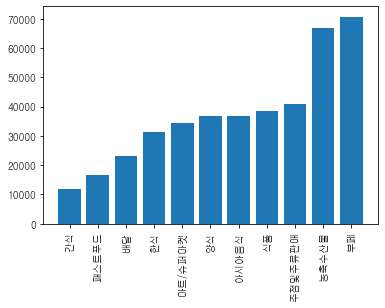

In [90]:
plt.bar(mct.index,mct['amt_per_cnt'])
plt.xticks(rotation=90)

- 간식의 객단가가 만원이 살짝 넘는 걸로 확인되기 때문에 편의점, 카페 같은 곳으로 생각해도 될듯..

## 업종 별 결제 건수, 금액  평균 추이

In [21]:
consume['year']=consume['base_date'].apply(lambda date : date.split('-')[0] )
consume['month']=consume['base_date'].apply(lambda date : date.split('-')[1] )
consume['day']=consume['base_date'].apply(lambda date : date.split('-')[2] )
consume.head()

base_date city    emd_cd emd_nm mct_cat_cd mct_cat_nm  use_cnt    use_amt  \
0  2018-01-06  제주시  50110650     연동     C00100         한식     3643  127777300   
1  2018-01-09  제주시  50110650     연동     C00500      패스트푸드      432    6711675   
2  2018-01-15  제주시  50110650     연동     C01200      농축수산물      236   16089579   
3  2018-01-15  제주시  50110650     연동     A00200    마트/슈퍼마켓     4031  121979867   
4  2018-01-20  제주시  50110650     연동     C01000         식품      633   30410674   

   year month day  
0  2018    01  06  
1  2018    01  09  
2  2018    01  15  
3  2018    01  15  
4  2018    01  20

In [22]:
mct_year=consume.pivot_table(['use_cnt','use_amt'],index=['year'],columns=['mct_cat_nm'])
mct_year

use_amt                                            \
mct_cat_nm            간식         농축수산물       마트/슈퍼마켓            배달   
year                                                                 
2018        2.535839e+06  5.928546e+06  3.257083e+07  7.987607e+05   
2019        2.629036e+06  6.384660e+06  3.158620e+07  1.850622e+06   
2020        2.680341e+06  6.902961e+06  3.276596e+07  4.376501e+06   
2021        2.613855e+06  7.482472e+06  3.288138e+07  7.973644e+06   

                                                                     \
mct_cat_nm             부페            식품         아시아음식            양식   
year                                                                  
2018        499470.204319  1.061289e+07  3.726974e+06  1.915656e+06   
2019        518045.694039  1.179113e+07  3.854585e+06  1.964860e+06   
2020        478403.917088  1.360222e+07  3.710763e+06  1.844798e+06   
2021        382486.570574  1.336254e+07  3.346934e+06  1.629673e+06   

                                        ...     use_cnt              \
mct_cat_nm       주점및주류판매         패스트푸드  ...       농축수산물     마트/슈퍼마켓   
year                                    ...                           
2018        8.584474e+05  2.976204e+06  ...   86.483661  936.084039   
2019        1.044115e+06  3.156430e+06  ...   96.745582  940.048904   
2020        1.161810e+06  3.070847e+06  ...  107.811125  956.494869   
2021        1.022827e+06  2.615237e+06  ...  106.197358  917.893651   

                                                                     \
mct_cat_nm          배달        부페          식품       아시아음식         양식   
year                                                                  
2018         38.163794  7.648605  271.097625   96.721835  52.931970   
2019         84.563613  7.409091  309.249297  104.991314  53.612410   
2020        187.453542  6.559343  358.518266  104.747312  50.715839   
2021        335.543241  6.244019  351.754219   98.733229  46.477048   

                                               
mct_cat_nm    주점및주류판매       패스트푸드          한식  
year                                           
2018        22.418621  176.880789  905.652320  
2019        26.805772  187.991420  987.576614  
2020        28.727459  180.866224  979.019682  
2021        24.271908  161.185927  903.915160  

[4 rows x 22 columns]

Text(0, 0.5, '결제 금액')

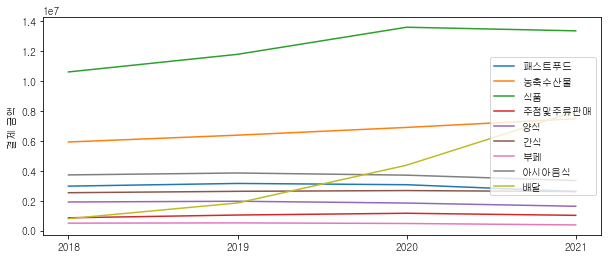

In [23]:
plt.figure(figsize=(10,4))
for name in consume['mct_cat_nm'].unique():
    if name=='한식' or name=='마트/슈퍼마켓':
        continue
    plt.plot(mct_year.index,mct_year['use_amt',name],label=name)
plt.legend(loc='right')
plt.ylabel('결제 금액')



Text(0, 0.5, '결제 건수')

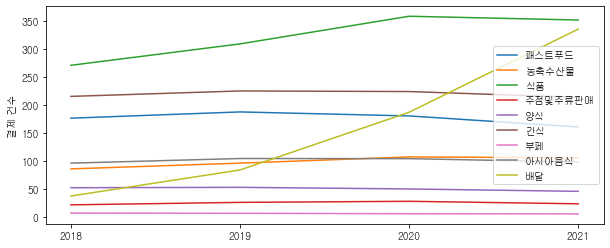

In [24]:
plt.figure(figsize=(10,4))
for name in consume['mct_cat_nm'].unique():
    if name=='한식' or name=='마트/슈퍼마켓':
        continue
    plt.plot(mct_year.index,mct_year['use_cnt',name],label=name)
plt.legend(loc='right')
plt.ylabel('결제 건수')

- 한식과 마트는 압도적으로 높아서 그래프에서 제거
- 배달의 결제 건수와 결제 금액 급격히 증가 추이
- 식품, 농축산물 의 꾸준히 결제 건수, 결제 금액 증가 추이

### 지역별 식품, 배달 업종 결제 건수 증가 추이

In [25]:
area_spec=consume.loc[(consume['mct_cat_nm']=='배달')|(consume['mct_cat_nm']=='식품')|(consume['mct_cat_nm']=='농축수산물')]
area_spec.head()

base_date city    emd_cd emd_nm mct_cat_cd mct_cat_nm  use_cnt   use_amt  \
2   2018-01-15  제주시  50110650     연동     C01200      농축수산물      236  16089579   
4   2018-01-20  제주시  50110650     연동     C01000         식품      633  30410674   
8   2018-01-30  제주시  50110650     연동     C01000         식품      481  18497443   
15  2018-02-07  제주시  50110650     연동     C01000         식품      303   9668801   
17  2018-02-09  제주시  50110650     연동     C01200      농축수산물      337  45739202   

    year month day  
2   2018    01  15  
4   2018    01  20  
8   2018    01  30  
15  2018    02  07  
17  2018    02  09

In [26]:
area=area_spec.pivot_table(['use_cnt'],index=['year','emd_nm'],columns=['mct_cat_nm'])
area

use_cnt                         
mct_cat_nm        농축수산물          배달           식품
year emd_nm                                     
2018 건입동      67.408219   28.348901   250.983562
     구좌읍      63.467033    9.481481   283.375342
     남원읍      51.038356   14.476471   316.931507
     노형동     297.101370  198.284932  1157.736986
     대륜동      50.219178   21.798319   112.504110
...                 ...         ...          ...
2021 표선면      42.688889   86.834254   236.165746
     한경면      25.814607   30.227778   183.696133
     한림읍      62.414365  207.171271   475.408840
     화북동     259.077348  588.204420   443.790055
     효돈동      34.266667   34.364641   138.027624

[176 rows x 3 columns]

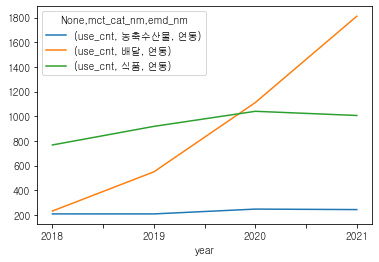

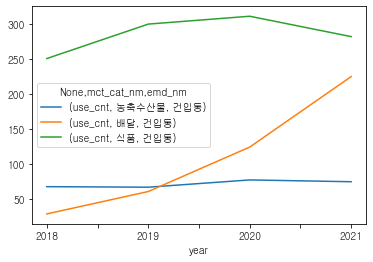

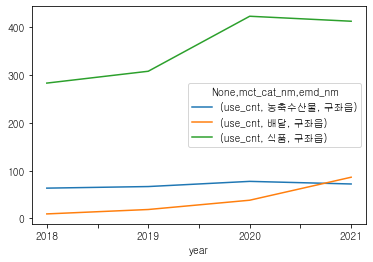

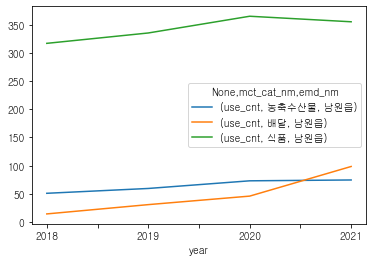

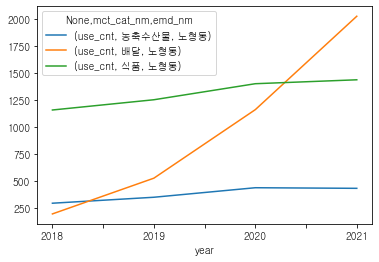

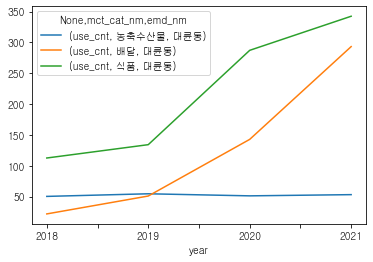

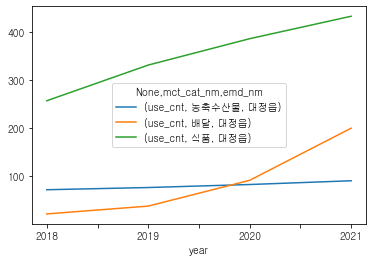

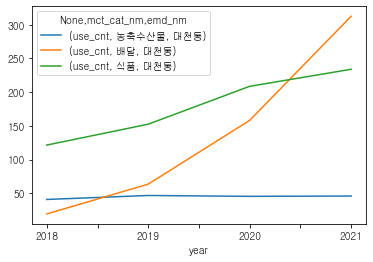

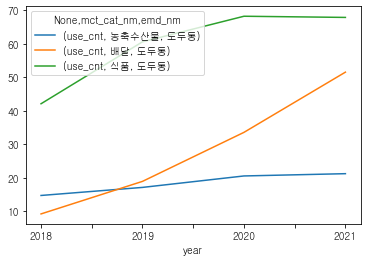

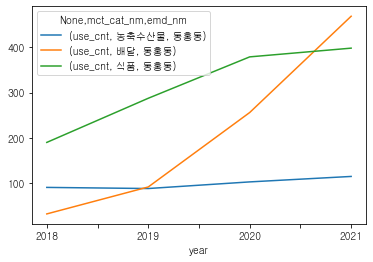

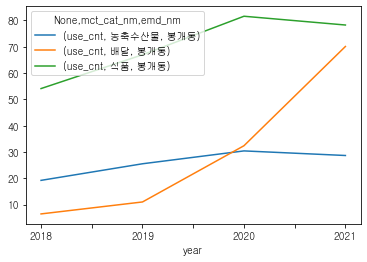

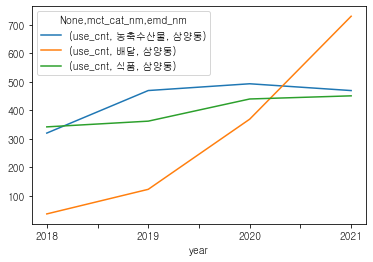

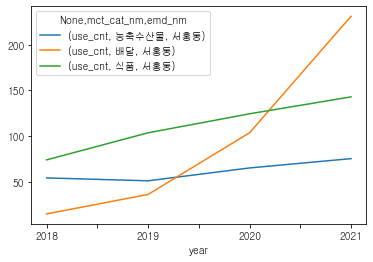

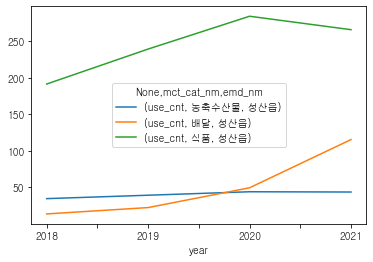

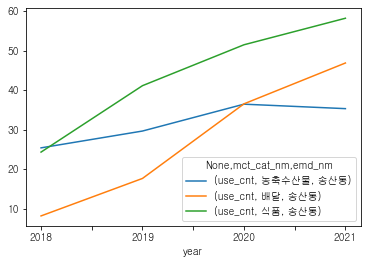

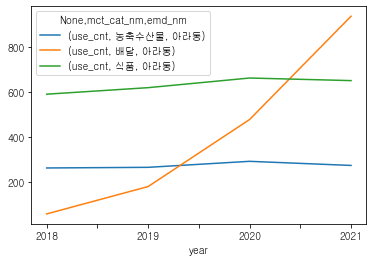

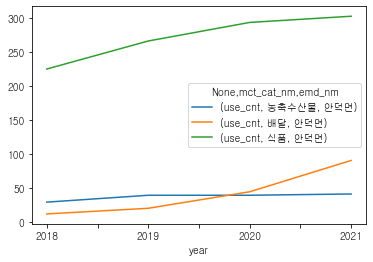

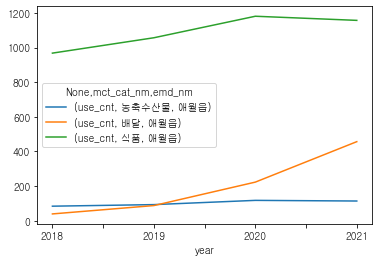

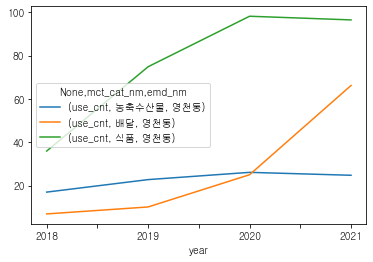

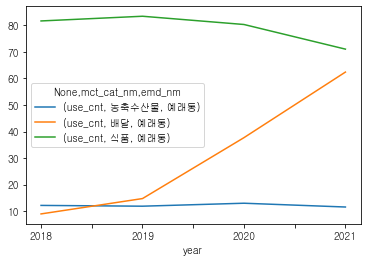

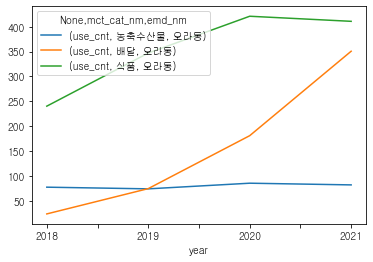

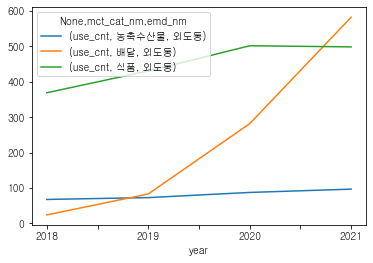

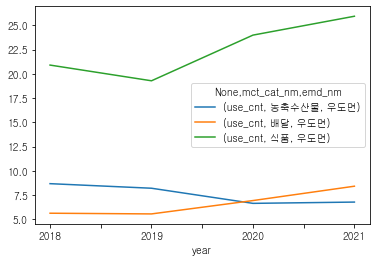

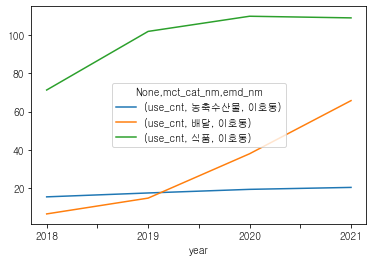

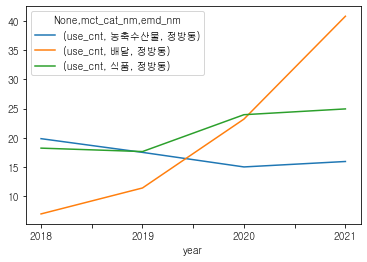

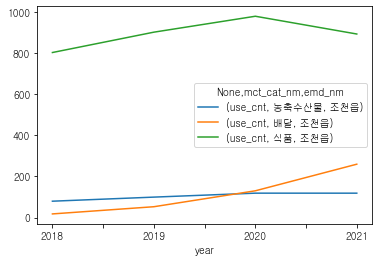

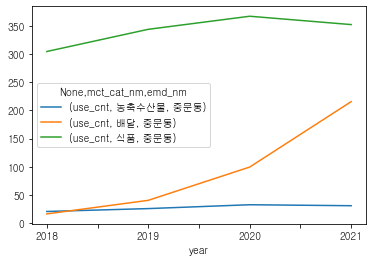

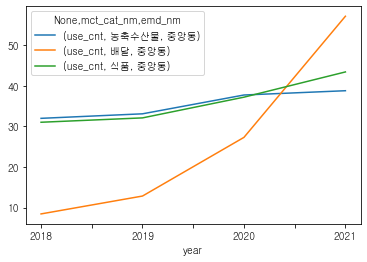

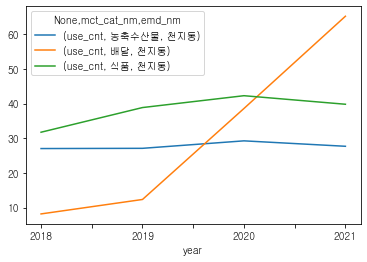

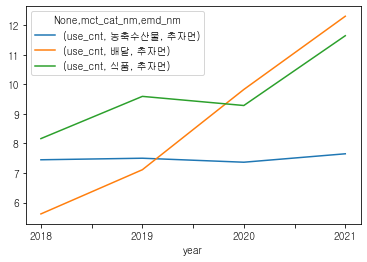

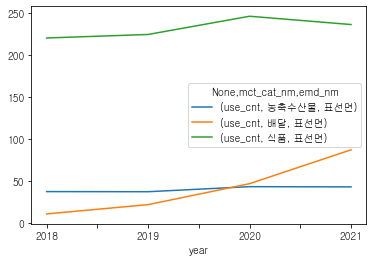

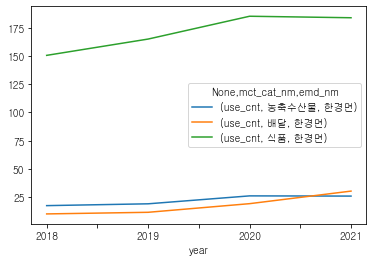

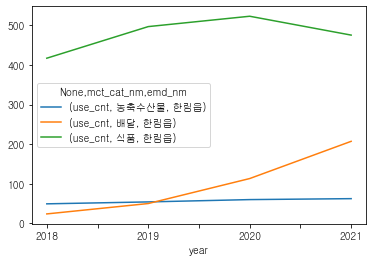

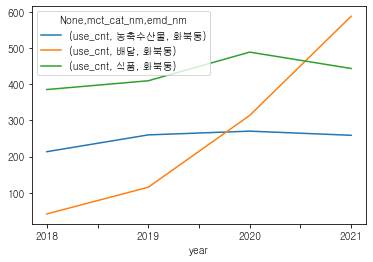

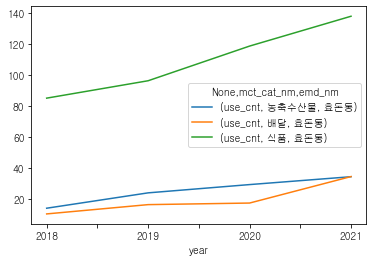

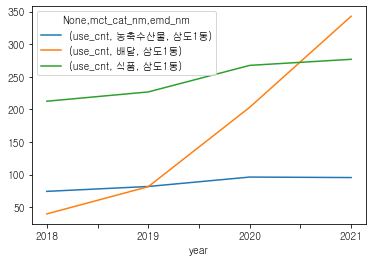

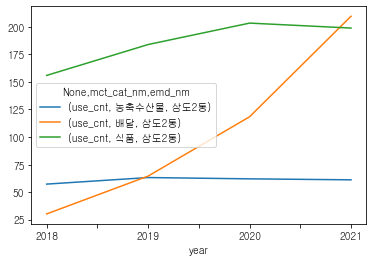

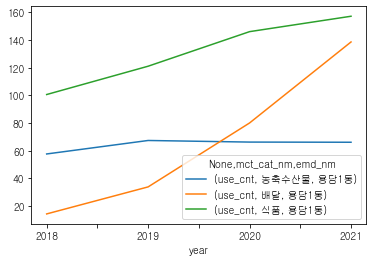

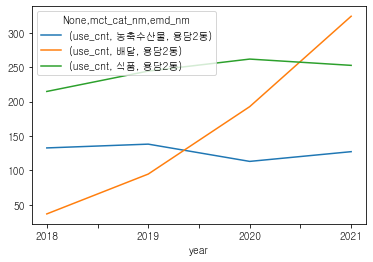

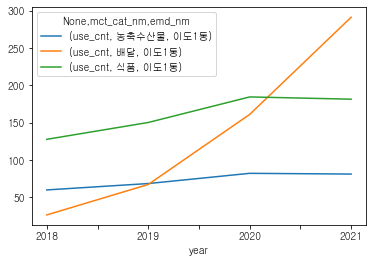

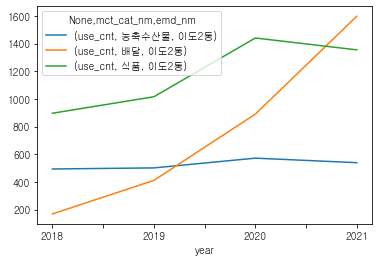

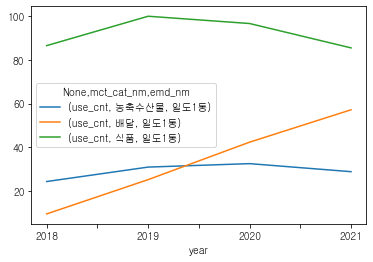

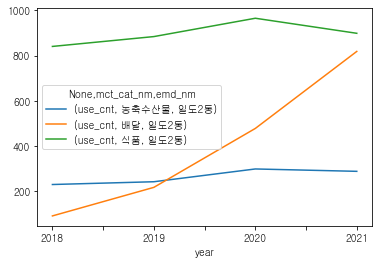

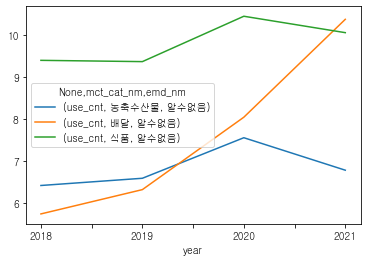

In [27]:
idx=pd.IndexSlice
for name in consume['emd_nm'].unique():
    region=area.loc[idx[:,name],idx[:,:]]
    region.unstack().plot(kind='line')

## 결제 건수와 결제 금액  평균 추이

In [28]:
#2021년 데이터가 얼마 없어서 mean으로 계산
use_year=consume[['use_amt','use_cnt','year']].groupby(['year']).mean()
use_year.head()

use_amt     use_cnt
year                          
2018  9.526030e+06  291.897854
2019  9.803252e+06  310.045892
2020  1.037658e+07  328.441291
2021  1.041067e+07  330.198778

Text(0, 0.5, '결제금액')

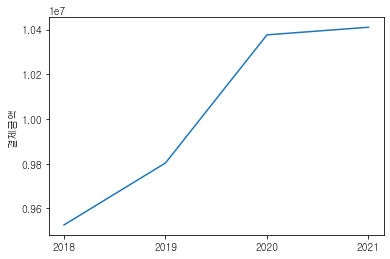

In [29]:
plt.plot(use_year.index,use_year['use_amt'])
plt.ylabel('결제금액')

Text(0, 0.5, '결제건수')

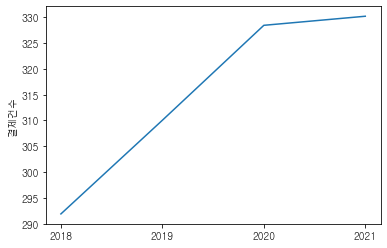

In [30]:
plt.plot(use_year.index,use_year['use_cnt'])
plt.ylabel('결제건수')

## 변수들의 상관관계

In [31]:
consume.drop(columns=['base_date','emd_cd','mct_cat_cd'],inplace=True)

In [32]:
consume.head()

city emd_nm mct_cat_nm  use_cnt    use_amt  year month day
0  제주시     연동         한식     3643  127777300  2018    01  06
1  제주시     연동      패스트푸드      432    6711675  2018    01  09
2  제주시     연동      농축수산물      236   16089579  2018    01  15
3  제주시     연동    마트/슈퍼마켓     4031  121979867  2018    01  15
4  제주시     연동         식품      633   30410674  2018    01  20

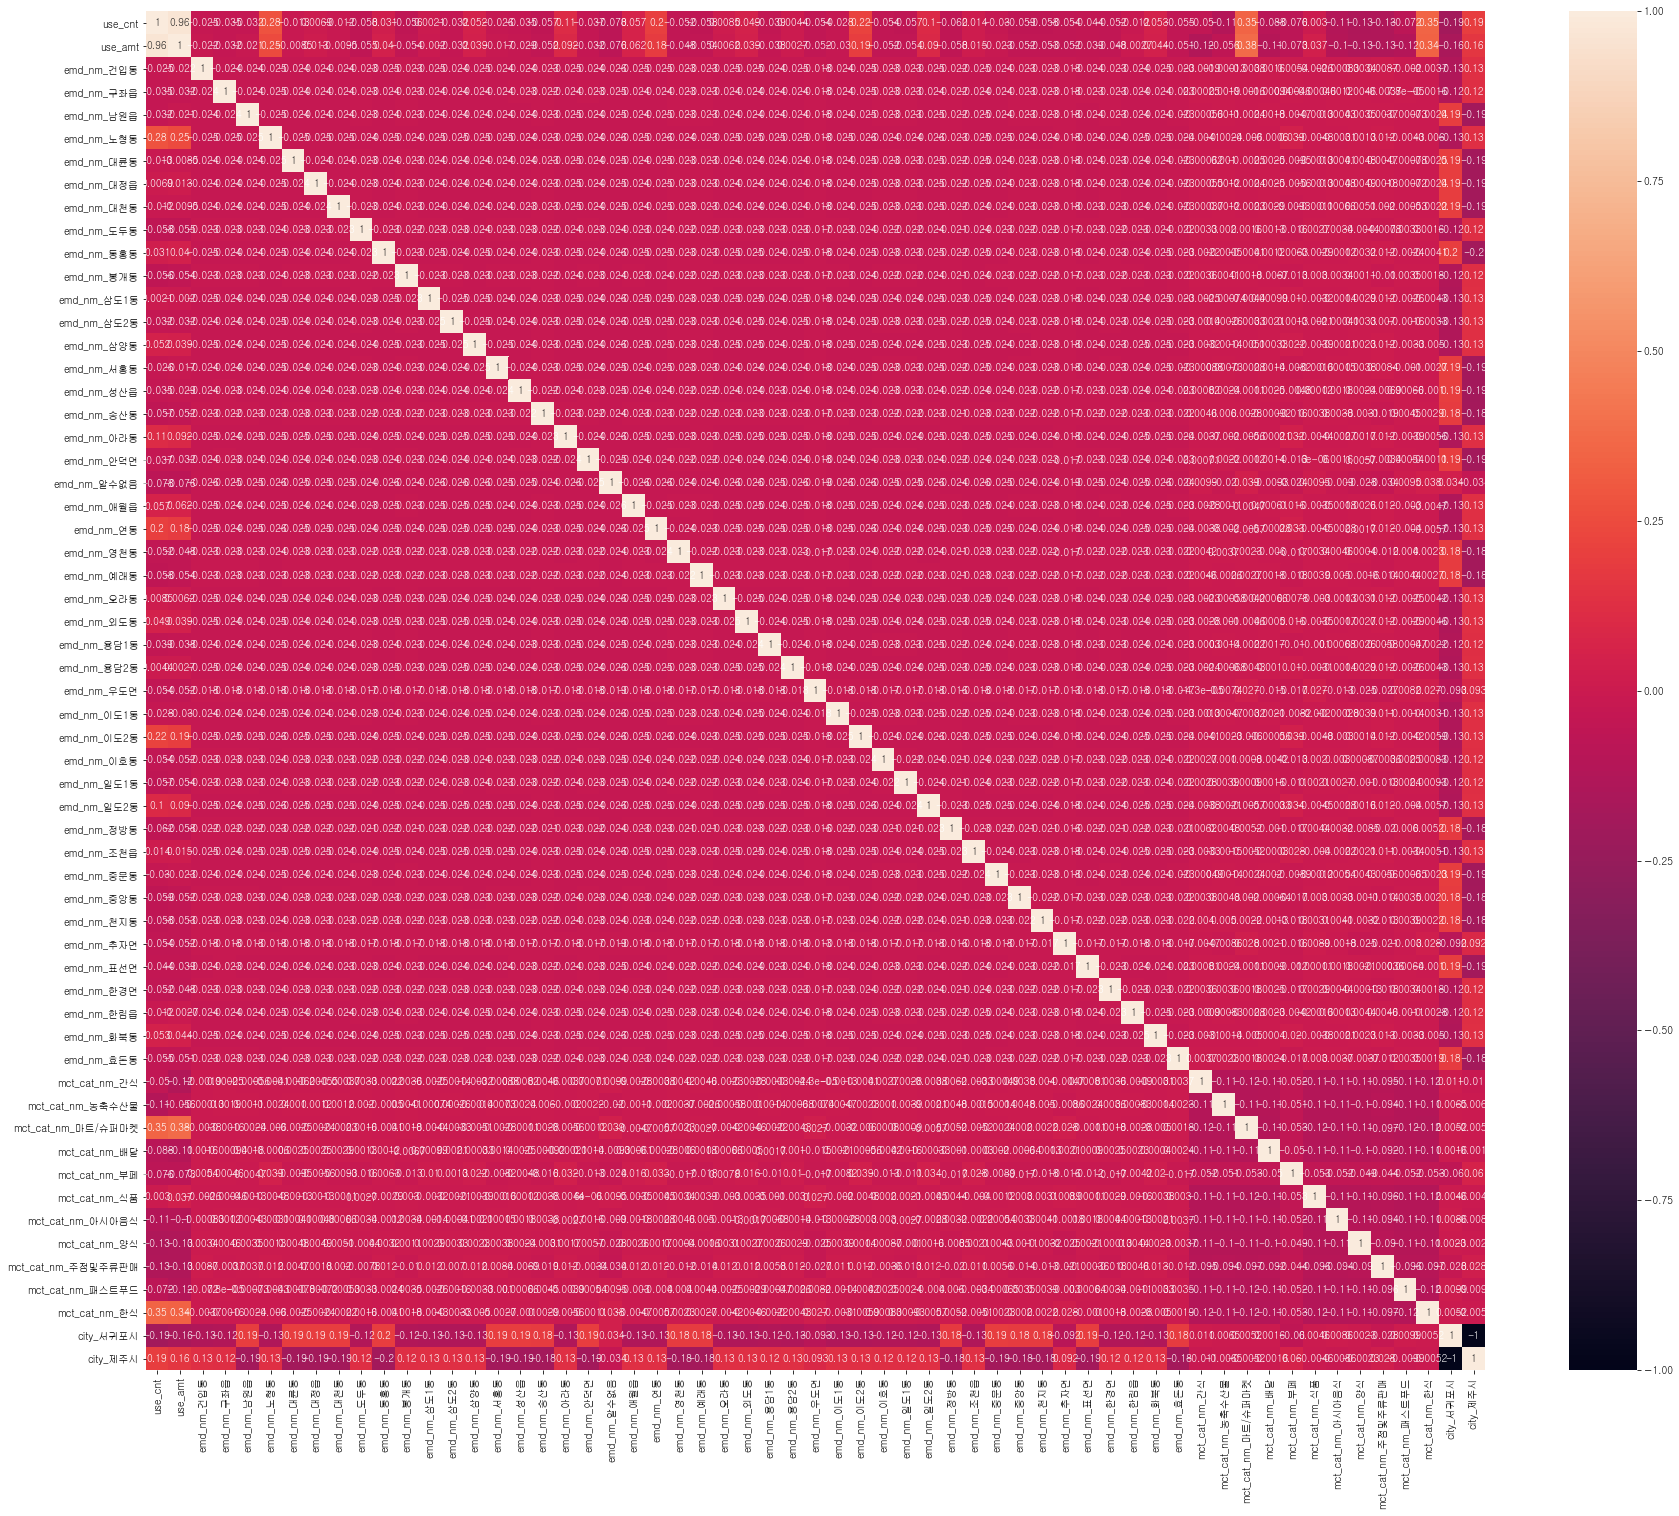

In [33]:
import seaborn as sns
consume=pd.get_dummies(consume,columns=['emd_nm','mct_cat_nm','city'])
consum_corr=consume.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(consum_corr, annot=True)
plt.show()